In [1]:
import nba_api.stats.endpoints as nba
import nba_api.stats.static.players as players
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
pd.set_option('display.max_columns', None)

In [2]:
shots = pd.read_csv('NBA_2024_Shots.csv')
shots.head(5)

,SEASON_1,SEASON_2,TEAM_ID,TEAM_NAME,PLAYER_ID,PLAYER_NAME,POSITION_GROUP,POSITION,GAME_DATE,GAME_ID,HOME_TEAM,AWAY_TEAM,EVENT_TYPE,SHOT_MADE,ACTION_TYPE,SHOT_TYPE,BASIC_ZONE,ZONE_NAME,ZONE_ABB,ZONE_RANGE,LOC_X,LOC_Y,SHOT_DISTANCE,QUARTER,MINS_LEFT,SECS_LEFT
0,2024,2023-24,1610612764,Washington Wizards,1629673,Jordan Poole,G,SG,11-03-2023,22300003,MIA,WAS,Missed Shot,False,Driving Floating Jump Shot,2PT Field Goal,In The Paint (Non-RA),Center,C,8-16 ft.,-0.4,17.45,12,1,11,1
1,2024,2023-24,1610612764,Washington Wizards,1630166,Deni Avdija,F,SF,11-03-2023,22300003,MIA,WAS,Made Shot,True,Jump Shot,3PT Field Goal,Above the Break 3,Center,C,24+ ft.,1.5,30.55,25,1,10,26
2,2024,2023-24,1610612764,Washington Wizards,1626145,Tyus Jones,G,PG,11-03-2023,22300003,MIA,WAS,Made Shot,True,Driving Layup Shot,2PT Field Goal,Restricted Area,Center,C,Less Than 8 ft.,-3.3,6.55,3,1,9,46
3,2024,2023-24,1610612764,Washington Wizards,1629673,Jordan Poole,G,SG,11-03-2023,22300003,MIA,WAS,Made Shot,True,Running Finger Roll Layup Shot,2PT Field Goal,Restricted Area,Center,C,Less Than 8 ft.,-1.0,5.85,1,1,8,30
4,2024,2023-24,1610612764,Washington Wizards,1626145,Tyus Jones,G,PG,11-03-2023,22300003,MIA,WAS,Made Shot,True,Cutting Layup Shot,2PT Field Goal,Restricted Area,Center,C,Less Than 8 ft.,-0.0,6.25,1,1,8,8


In [3]:
def draw_court(ax=None, color='black', lw=2):
    if ax is None:
        ax = plt.gca()

    hoop = plt.Circle((0, 4.75), 0.75, linewidth=lw, color=color, fill=False)
    
    backboard = plt.Line2D([-3, 3], [4, 4], linewidth=lw, color=color)
    
    outer_box = plt.Rectangle((-8, 0), 16, 19, linewidth=lw, color=color, fill=False)
    inner_box = plt.Rectangle((-6, 0), 12, 19, linewidth=lw, color=color, fill=False)
    
    top_free_throw = plt.Circle((0, 19), 6, linewidth=lw, color=color, fill=False)
    bottom_free_throw = plt.Circle((0, 19), 6, linewidth=lw, color=color, fill=False, linestyle='dashed')
    
    three_point_arc = plt.Circle((0, 4.75), 23.75, linewidth=lw, color=color, fill=False)
    
    corner_left = plt.Line2D([-22, -22], [0, 14], linewidth=lw, color=color)
    corner_right = plt.Line2D([22, 22], [0, 14], linewidth=lw, color=color)

    half_court = plt.Circle((0, 47), 6, linewidth=lw, color=color, fill=False)
    
    elements = [hoop, outer_box, inner_box, top_free_throw, bottom_free_throw, 
                three_point_arc, half_court]
    for element in elements:
        ax.add_patch(element)

    lines = [backboard, corner_left, corner_right]
    for line in lines:
        ax.add_line(line)
    ax.set_xlim(-25, 25)
    ax.set_ylim(0, 47)

    return ax

In [13]:
def player_maker(name):
    curr = shots[shots['PLAYER_NAME'] == name]
    made = curr[curr['SHOT_MADE'] == True].count()
    missed = curr[curr['SHOT_MADE'] == False].count()
    print(name + ' made ' + str(made[0]) + ' shots and missed ' + str(missed[0]) + ' shots.')
    print("That's a field goal percentage of " + str(round((made[0] / (made[0] + missed[0])) * 100, 2)) + '%.')
    plt.figure(figsize=(12, 11))
    plt.title(name + ' Shot Chart 2024')
    ax = draw_court()
    plt.scatter(curr[curr['SHOT_MADE'] == True]['LOC_X'], curr[curr['SHOT_MADE'] == True]['LOC_Y'], c='green', label='Made')
    plt.scatter(curr[curr['SHOT_MADE'] == False]['LOC_X'], curr[curr['SHOT_MADE'] == False]['LOC_Y'], c='red', label='Missed')
    plt.legend()
    plt.xlim(-25, 25)
    plt.ylim(0, 47)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel('')
    plt.ylabel('')
    plt.gca().set_facecolor('lightgrey')
    plt.grid(False)
    plt.show()

Jordan Poole made 490 shots and missed 696 shots.
That's a field goal percentage of 41.32%.


/var/folders/3z/jyhjhbks7yxgzl36tjc4g15h0000gn/T/ipykernel_64734/3993084276.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(name + ' made ' + str(made[0]) + ' shots and missed ' + str(missed[0]) + ' shots.')
/var/folders/3z/jyhjhbks7yxgzl36tjc4g15h0000gn/T/ipykernel_64734/3993084276.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("That's a field goal percentage of " + str(round((made[0] / (made[0] + missed[0])) * 100, 2)) + '%.')


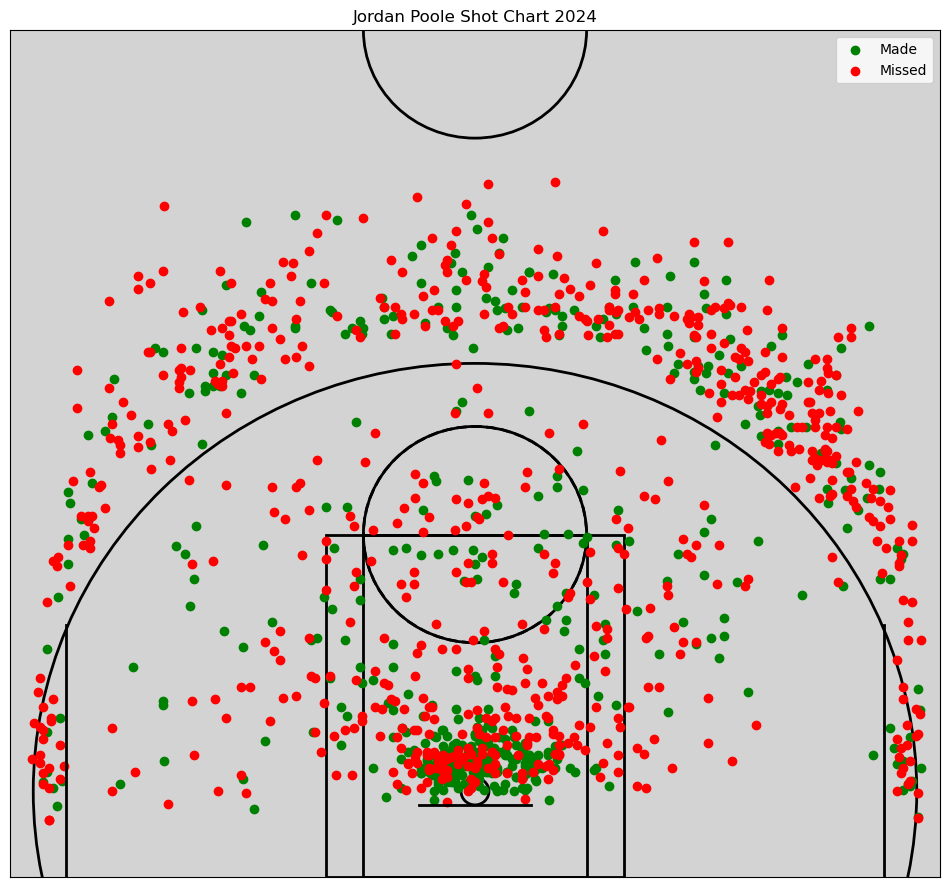

In [14]:
player_maker('Jordan Poole')

Payton Pritchard made 297 shots and missed 338 shots.
That's a field goal percentage of 46.77%.


/var/folders/3z/jyhjhbks7yxgzl36tjc4g15h0000gn/T/ipykernel_64734/3993084276.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(name + ' made ' + str(made[0]) + ' shots and missed ' + str(missed[0]) + ' shots.')
/var/folders/3z/jyhjhbks7yxgzl36tjc4g15h0000gn/T/ipykernel_64734/3993084276.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("That's a field goal percentage of " + str(round((made[0] / (made[0] + missed[0])) * 100, 2)) + '%.')


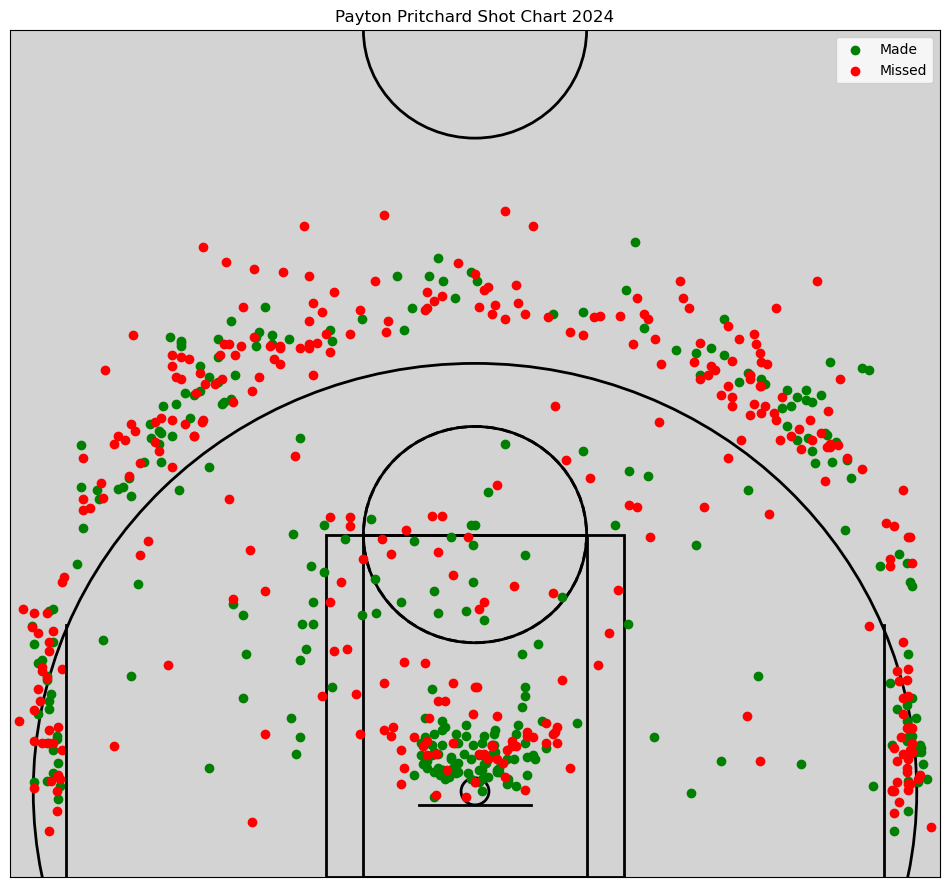

In [15]:
player_maker('Payton Pritchard')

Stephen Curry made 650 shots and missed 795 shots.
That's a field goal percentage of 44.98%.


/var/folders/3z/jyhjhbks7yxgzl36tjc4g15h0000gn/T/ipykernel_64734/3993084276.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(name + ' made ' + str(made[0]) + ' shots and missed ' + str(missed[0]) + ' shots.')
/var/folders/3z/jyhjhbks7yxgzl36tjc4g15h0000gn/T/ipykernel_64734/3993084276.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("That's a field goal percentage of " + str(round((made[0] / (made[0] + missed[0])) * 100, 2)) + '%.')


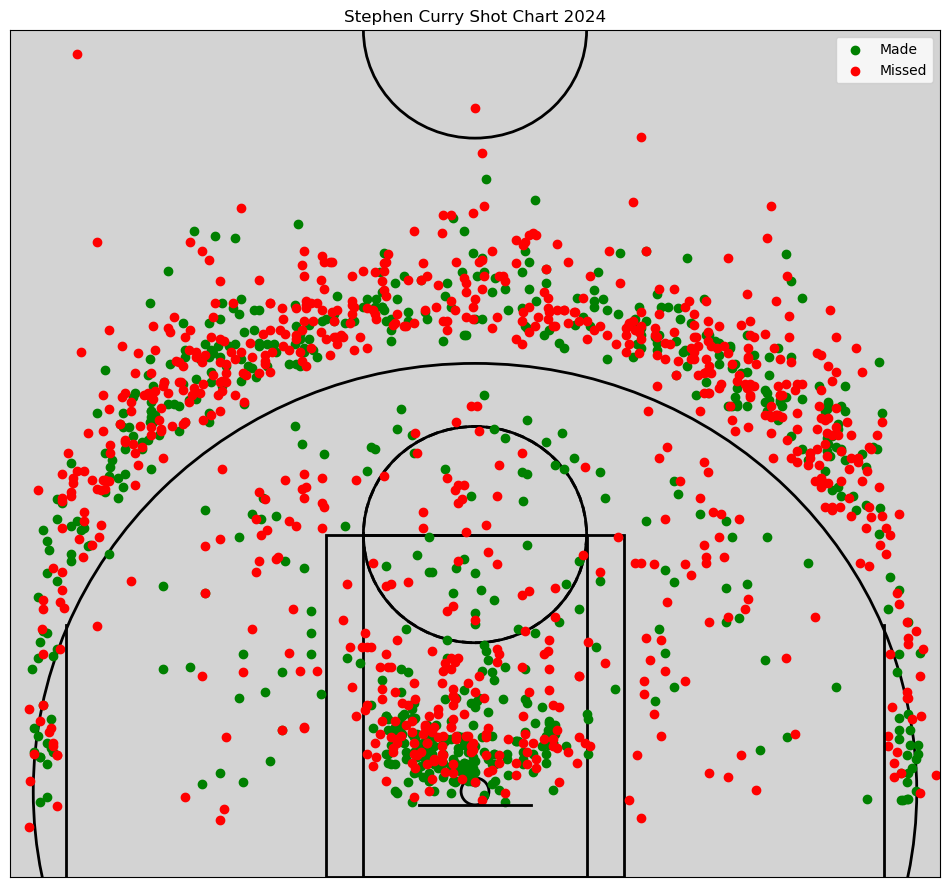

In [16]:
player_maker('Stephen Curry')

In [17]:
data24 = pd.read_csv('NBA_2024_Shots.csv')
data23 = pd.read_csv('NBA_2023_Shots.csv')
data22 = pd.read_csv('NBA_2022_Shots.csv')
stats24 = pd.read_csv('nbastats2023-24.csv')
stats23 = pd.read_csv('nbastats2022-23.csv')

In [18]:
stats24.head()

,RANK,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,FTA,FT%,2PA,2P%,3PA,3P%,eFG%,TS%,PPG,RPG,APG,SPG,BPG,TPG,P+R,P+A,P+R+A,VI,ORtg,DRtg
0,NaN,GG Jackson,Mem,F,19.3,48,25.7,24.2,10.3,153,0.752,277,0.502,286,0.357,0.519,0.554,14.6,4.1,1.2,0.6,0.5,1.4,18.6,15.8,19.9,6.5,107.2,114.4
1,NaN,Bilal Coulibaly,Was,G,19.7,63,27.2,14.2,16.8,131,0.702,247,0.502,185,0.346,0.509,0.543,8.4,4.1,1.7,0.9,0.8,1.4,12.5,10.2,14.3,5.7,102.6,115.9
2,NaN,Dariq Whitehead,Bro,F,19.7,2,12.0,10.6,0.0,2,0.500,2,0.500,3,0.000,0.200,0.255,1.5,2.0,1.5,0.0,0.5,0.0,3.5,3.0,5.0,5.5,83.5,121.1
3,NaN,Cam Whitmore,Hou,F,19.8,47,18.7,27.2,9.0,112,0.679,247,0.538,220,0.359,0.539,0.561,12.3,3.8,0.7,0.6,0.4,1.0,16.1,13.0,16.9,6.8,108.8,108.9
4,NaN,Noah Clowney,Bro,F,19.8,23,16.1,14.2,13.8,30,0.700,60,0.633,33,0.364,0.602,0.626,5.8,3.5,0.8,0.3,0.7,0.7,9.3,6.6,10.1,6.3,121.4,112.5


In [ ]:
# import pandas as pd
# from nba_api.stats.static import players
# from nba_api.stats.endpoints import (
#     commonplayerinfo,
#     playerdashboardbygeneralsplits,
#     playercareerstats
# )
# from time import sleep
# from concurrent.futures import ThreadPoolExecutor

In [ ]:
# def get_active_players():
#     player_list = players.get_players()
#     active_players = [p for p in player_list if p["is_active"]]
#     return active_players

In [ ]:
# def fetch_player_bio(player_id):
#     try:
#         bio = commonplayerinfo.CommonPlayerInfo(player_id=player_id).get_data_frames()[0]
#         if not bio.empty:
#             return {
#                 "PLAYER_ID": player_id,
#                 "HEIGHT_INCHES": convert_height_to_inches(bio["HEIGHT"].values[0]),
#                 "WEIGHT_LBS": bio["WEIGHT"].values[0],
#             }
#     except Exception as e:
#         print(f"Error fetching bio for {player_id}: {e}")
#         return None

# def convert_height_to_inches(height):
#     try:
#         feet, inches = map(int, height.split("-"))
#         return feet * 12 + inches
#     except:
#         return None

In [ ]:
# def fetch_play_types(player_id, season, measure_types):
#     combined_data = {"PLAYER_ID": player_id, "SEASON": season}
#     for measure_type in measure_types:
#         try:
#             stats = playerdashboardbygeneralsplits.PlayerDashboardByGeneralSplits(
#                 player_id=player_id,
#                 season=season,
#                 measure_type_detailed=measure_type,
#                 per_mode_detailed="Per36",
#             ).get_data_frames()[0]
#             if not stats.empty:
#                 avg_stats = stats.mean(numeric_only=True).to_dict()
#                 combined_data.update({f"{measure_type}_{k}": v for k, v in avg_stats.items()})
#             sleep(1.5)  # Avoid rate limiting
#         except Exception as e:
#             print(f"Error fetching {measure_type} for {player_id}: {e}")
#     return combined_data

In [ ]:
# def collect_all_data(seasons, measure_types):
#     active_players = get_active_players()
#     all_data = []

#     def process_player(player):
#         player_id = player["id"]
#         player_name = player["full_name"]
#         print(f"Processing {player_name} (ID: {player_id})...")
        
#         player_data = {"PLAYER_ID": player_id, "PLAYER_NAME": player_name}
#         # bio info
#         bio = fetch_player_bio(player_id)
#         if bio:
#             player_data.update(bio)

#         # season stats
#         for season in seasons:
#             play_data = fetch_play_types(player_id, season, measure_types)
#             if play_data:
#                 player_data.update({f"{season}_{k}": v for k, v in play_data.items()})
#         return player_data

#     with ThreadPoolExecutor(max_workers=5) as executor:
#         results = list(executor.map(process_player, active_players))
#         all_data.extend([r for r in results if r])

#     return pd.DataFrame(all_data)

In [ ]:
# seasons = ["2021-22", "2022-23", "2023-24"]
# measure_types = [
#     "SpeedDistance", "Rebounding", "Possessions", "CatchShoot",
#     "PullUpShot", "Defense", "Drives", "Passing", "ElbowTouch",
#     "PostTouch", "PaintTouch", "Efficiency"
# ]

# final_df = collect_all_data(seasons, measure_types)
# final_df.to_csv("nba_player_data.csv", index=False)

Processing Precious Achiuwa (ID: 1630173)...
Processing Bam Adebayo (ID: 1628389)...
Processing Ochai Agbaji (ID: 1630534)...
Processing Santi Aldama (ID: 1630583)...
Processing Nickeil Alexander-Walker (ID: 1629638)...
Error fetching SpeedDistance for 1629638: 'resultSet'Error fetching SpeedDistance for 1628389: 'resultSet'

Error fetching SpeedDistance for 1630583: 'resultSet'
Error fetching Rebounding for 1628389: 'resultSet'
Error fetching Rebounding for 1629638: 'resultSet'
Error fetching Rebounding for 1630583: 'resultSet'
Error fetching SpeedDistance for 1630173: 'resultSet'
Error fetching Possessions for 1628389: 'resultSet'
Error fetching Possessions for 1629638: 'resultSet'
Error fetching Rebounding for 1630173: 'resultSet'
Error fetching Possessions for 1630583: 'resultSet'
Error fetching CatchShoot for 1628389: 'resultSet'
Error fetching Possessions for 1630173: 'resultSet'
Error fetching CatchShoot for 1629638: 'resultSet'
Error fetching PullUpShot for 1628389: 'resultSet'

In [ ]:
# features = ['PTS', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'HEIGHT', 'WEIGHT']
# X = final_df[features]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

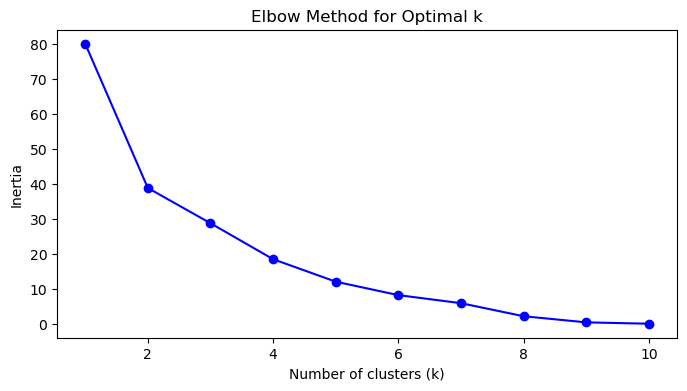

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
final_player_data['Cluster'] = kmeans.labels_


In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=final_df['Cluster'], palette='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Player Archetypes using K-Means Clustering')
plt.legend(title='Cluster')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Assuming you have your per-36 stats data in a DataFrame called df
df_36 = pd.read_csv("nba_player_data_per36.csv")

# Perform PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_36)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(reduced_data)

# Create a DataFrame with the reduced data and the cluster labels
clustered_df = pd.DataFrame(reduced_data, columns=["Dim1", "Dim2"])
clustered_df['Cluster'] = clusters

# Define cluster labels for better visualization
cluster_labels = ["Balanced", "Inside Creator", "Screen & Roll Big", "Spot Up Shooter", "Outside Creator"]

# Plotting
plt.figure(figsize=(10, 7))
sns.set_style="whitegrid"

# Use scatter plot to visualize clusters
sns.scatterplot(
    x="Dim1", y="Dim2", hue="Cluster", style="Cluster", data=clustered_df,
    palette="Set2", markers=["o", "^", "s", "+", "X"], legend="full"
)

# Annotate plot
plt.title("Cluster Plot", fontsize=16, weight="bold")
plt.xlabel(f"Dim1 ({pca.explained_variance_ratio_[0] * 100:.1f}%)", fontsize=12)
plt.ylabel(f"Dim2 ({pca.explained_variance_ratio_[1] * 100:.1f}%)", fontsize=12)

# Adjust the legend to match cluster labels
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, cluster_labels, title="Cluster", loc="upper right", fontsize=10)

# Show the plot
plt.show()